In [1]:
# 以下のライブラリを使う
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数点第3位まで表示
%precision 3

# ランダムシードの固定
np.random.seed(0)

In [2]:
# サイコロがとりうる値を配列に格納
dice_data = np.array([1, 2, 3, 4, 5, 6])

In [3]:
# 引数は，対象データdice_dataから1つランダムに抽出するという意味
print('1つだけランダムに抽出：', np.random.choice(dice_data, 1))

1つだけランダムに抽出： [5]


# 統計的確率

In [4]:
# サイコロを1000回振ってみる
calc_steps = 1000

# 1~6のデータの中から，1000かいの抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

# それぞれの数字がどれくらいの割合で抽出されたか計算
for i in range(1, 7): 
    p = len(dice_rolls[dice_rolls == i]) / calc_steps
    print(i, 'が出る確率', p)

1 が出る確率 0.171
2 が出る確率 0.158
3 が出る確率 0.157
4 が出る確率 0.183
5 が出る確率 0.16
6 が出る確率 0.171


# 確率変数と確率分布

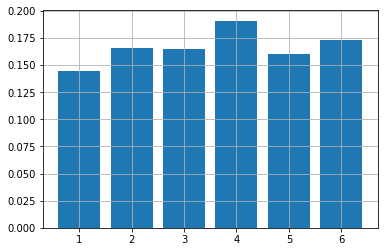

In [6]:
# 一様分布
# サイコロを1000回振ってみる
calc_step = 1000

# 1~6のデータの中から，1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

# それぞれの数字がどれくらいの割合で抽出されたかを計算
prob_data = np.array([])
for i in range(1, 7): 
    p = len(dice_rolls[dice_rolls == i]) / calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls == i]) / calc_steps)

plt.bar(dice_data, prob_data)
plt.grid(True)

In [7]:
# ベルヌーイ分布
# 0:head（表），1:tail（裏）と考える
# サンプル数を8とした
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])

# uniqueで一意な値を抽出（この場合は，0と1）
for i in np.unique(coin_data): 
    p = len(coin_data[coin_data == i]) / len(coin_data)
    print(i, 'が出る確率', p)
    prob_be_data = np.append(prob_be_data, p)

0 が出る確率 0.625
1 が出る確率 0.375


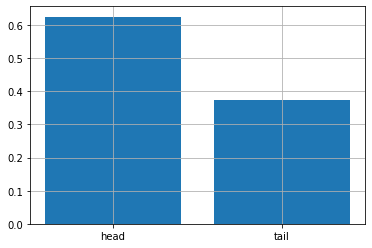

In [8]:
plt.bar([0, 1], prob_be_data, align = 'center')
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

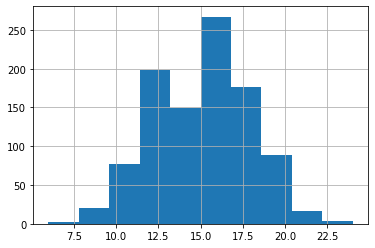

In [10]:
# 二項分布
np.random.seed(0)
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

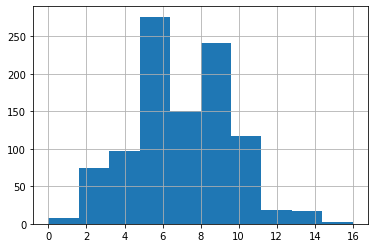

In [11]:
# ポアソン分布
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

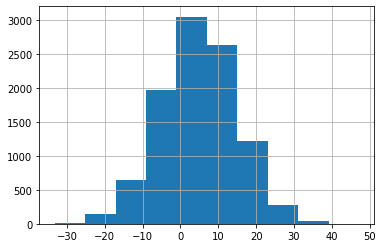

In [12]:
# 正規分布
# np.random.normal(平均，標準偏差，サンプル数)
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

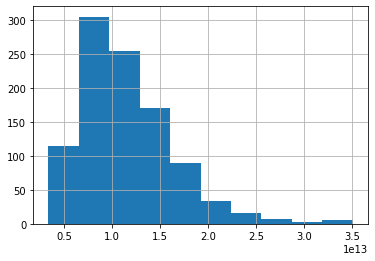

In [13]:
# 対数正規分布
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

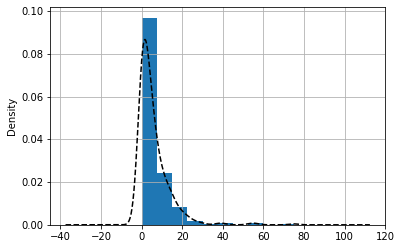

In [18]:
import requests
import zipfile
from io import StringIO
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(zip_file_url, stream = True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# データを読み込む
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# カーネル密度関数
student_data_math.absences.plot(kind = 'kde', style = 'k--')

# 単純なヒストグラム，density = Trueにすることで，確率で表示
student_data_math.absences.hist(density = True)
plt.grid(True)